In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
iris = load_iris()

# Convert dataset to Dataframe
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    columns= iris['feature_names'] + ['target'])

In [3]:
X = df.drop(columns=['target'], axis=1)
y = iris.target

In [4]:
# This is who will be used for predictions due to was fitted using all features
classifier_full = LogisticRegression(max_iter=1000, n_jobs=-1).fit(X, y)

In [5]:
def ContourPlot(X, y):

    colors=['purple', 'teal', 'gold']

    classifier = LogisticRegression(max_iter=1000, n_jobs=-1).fit(X, y)

    disp = DecisionBoundaryDisplay.from_estimator(classifier, X, response_method="auto",
                                                  grid_resolution=1000, plot_method='pcolormesh',
                                                  xlabel=X.columns[0], ylabel=X.columns[1],
                                                  alpha=0.45, cmap='viridis',
                                                  )
    # Used when wished legend()
    for class_label, color in zip(np.unique(y), colors):
        mask = y == class_label
        plt.scatter(X.iloc[:, 0:1][mask], X.iloc[:, 1:][mask],
                    label=f"Class {class_label}", edgecolor="k", color=color)

    # Used when not needed legend()
    #disp.ax_.scatter(X.iloc[:, 0:1], X.iloc[:, 1:], c=y, edgecolor="k", cmap='viridis')

    plt.legend()
    plt.show()

In [6]:
# Splitting features in pairs
X_sepal = X.iloc[:, 0:2]
X_petal = X.iloc[:, 2:4]

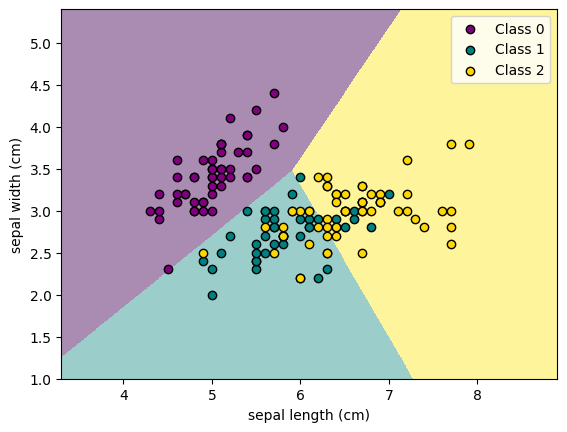

In [7]:
ContourPlot(X_sepal, y)

In [ ]:
ContourPlot(X_petal, y)